# King County Real Estate

## Overview

This notebook examines King County, WA dataset of houses and reviews how and what renovations add value to a house. 

## Business Problem

The goal is to provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount

## Data Understanding

### 1. Load the data using pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sqlite3
import warnings
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

%matplotlib inline

In [2]:
kc_house_df = pd.read_csv("data/kc_house_data.csv")

### 2. Data Cleaning

In [3]:
# Dropping null values
kc_house_df.dropna(inplace=True)

In [4]:
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

In [5]:
kc_house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.011100e+04,3.011100e+04,30111.000000,30111.000000,30111.000000,3.011100e+04,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000
mean,4.539171e+09,1.108971e+06,3.415197,2.335708,2113.342798,1.664880e+04,1.543506,1810.389658,476.617117,330.475308,217.451264,1975.162299,90.792767,47.328482,-121.318872
std,2.882236e+09,8.965158e+05,0.979755,0.888293,973.453260,5.993303e+04,0.567789,877.726339,579.805355,285.725020,245.301991,32.052930,416.197627,1.433309,5.724073
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.070850e+09,6.492360e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405348,-122.326075
50%,3.876000e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.477000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551440,-122.225790
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669917,-122.116394
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


The dataset has:
- 25 columns: 10 integers, 5 float, 10 objects.
- 30155 rows. 'heat_source' is the field with the highest amount of null-values: 32. Dropping them allows to keep 99.9% of the data, they were dropped without deteriorating. 



In [6]:
kc_house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [7]:
# kc_house_subset = kc_house_data.drop(columns=["date", "view", "sqft_above", "sqft_basement", "address", "lat", "long"])

In [8]:
# kc_house_subset.info()

The dataset now has 17 columns

### 2.(a). Removing unnecessary columns



The columns below are removed because they do not provide any value to the analysis to understand what renovations add value to a house.
\
Anything pertaining to the house location can be removed: will not have impact on renovations.
- lat 
- long
- address 
- greenbelt
- waterfront
- view

---------------------

anything pertaining to dataset admin can be removed 
- id 
- date (date house was sold) 
- yr_renovated


---------------------
to determine later: as recommended: 

     - sqft_above
     - sqft_basement

---------------------

In [9]:
unnecessary_columns = ["lat", "long", "address", "greenbelt", "waterfront", "view", "id", "date", "yr_renovated"]


In [10]:
kc_house_df = kc_house_df.drop(columns=kc_house_df[unnecessary_columns])

In [11]:
kc_house_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'nuisance', 'condition', 'grade', 'heat_source', 'sewer_system',
       'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built'],
      dtype='object')

### ------------------------------------------------------------------

### 1. First simple linear regression. Setting Up Variables for Regression

Declaring y and X_baseline variables, where y is a Series containing price data and X_baseline is a DataFrame containing the column with the strongest correlation.

In [12]:
y = kc_house_df["price"]

X_baseline = kc_house_df[["sqft_living"]]

### 1. First simple linear regression. Creating and Fitting Simple Linear Regression

In [13]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

### 1. First simple linear regression.  Evaluate and Interpret Baseline Model Results

In [14]:
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Sun, 23 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:31:46   Log-Likelihood:            -4.4847e+05
No. Observations:               30111   AIC:                         8.969e+05
Df Residuals:                   30109   BIC:                         8.970e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.559e+04   9798.815     -7.714      

### ------------------------------------------------------------------

### Check distribution of target variable to identify outliers

In [15]:
print(kc_house_df["price"].min())
print(kc_house_df["price"].max())

27360.0
30750000.0


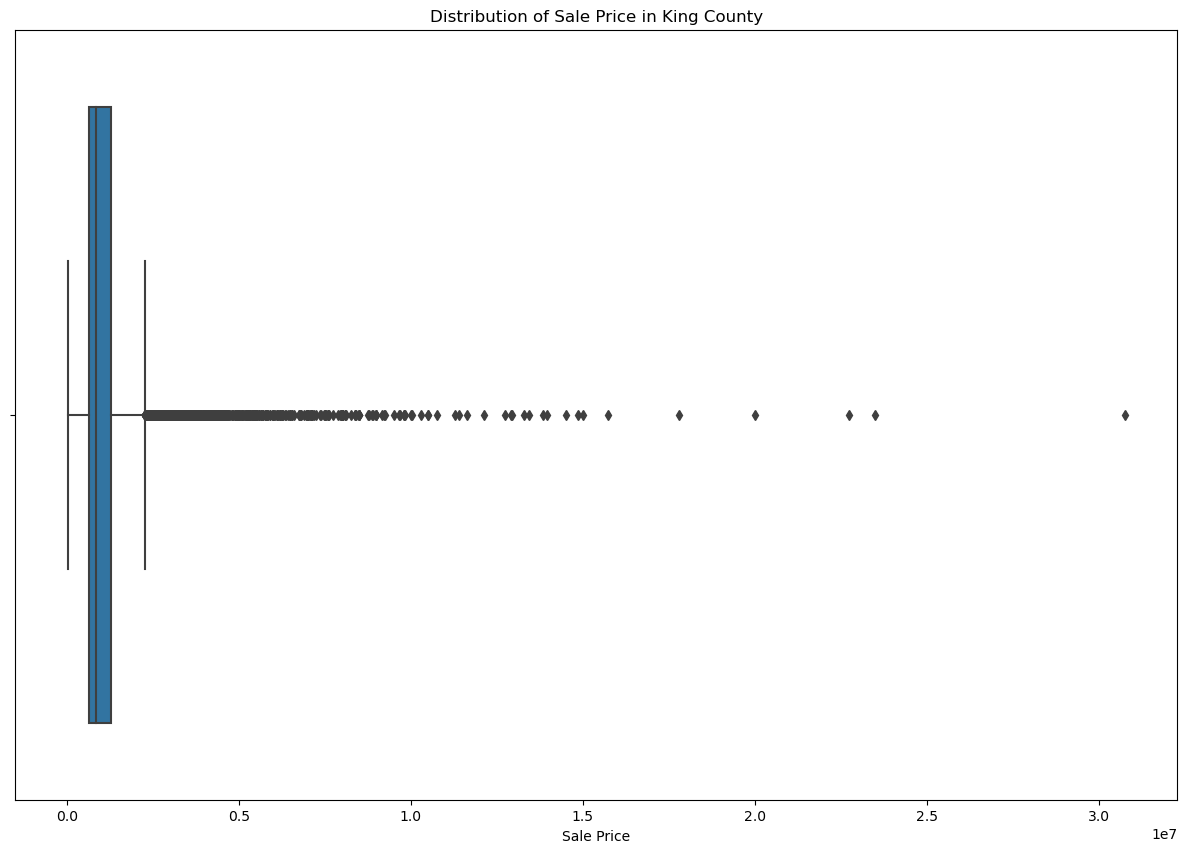

In [16]:
fig = plt.figure(figsize=(15, 10))
sns.boxplot(x = kc_house_df["price"])
plt.title('Distribution of Sale Price in King County')
plt.xlabel('Sale Price')
plt.show();

### Calculating outliers from 3 standard deviations from the mean 

#### version 1

In a normal distribution, 99.7% of the values are considered within 3 standard deviations from the mean. Anything above or below is considered outliers.


In [17]:
upper_limit = kc_house_df["price"].mean() + 3 * kc_house_df["price"].std()
upper_limit

3798518.1419607764

In [18]:
lower_limit = kc_house_df["price"].mean() - 3 * kc_house_df["price"].std()
lower_limit

-1580576.8387161149

In [19]:
assert kc_house_df["price"].min() < lower_limit

AssertionError: 

In [20]:
assert kc_house_df["price"].max() > upper_limit

### Calculating outliers from 5th percentile or at 0.3 and 99.7 percentiles?  

#### version 2

# ** should it be >= and <= ?

In [21]:
def outliers(data):
    for col in data:
        create a lower limit
        create a upper limit
        

SyntaxError: invalid syntax (2468221636.py, line 3)

In [22]:
lower_limit = np.percentile(kc_house_df["price"], 0.3)

In [23]:
upper_limit = np.percentile(kc_house_df["price"], 99.7)

In [24]:
assert kc_house_df["price"].min() < lower_limit

In [25]:
assert kc_house_df["price"].max() > upper_limit

In [26]:
kc_house_df = kc_house_df[(kc_house_df["price"] > lower_limit) & (kc_house_df["price"] < upper_limit)]

In [27]:
print(kc_house_df["price"].min())
print(kc_house_df["price"].max())

104186.0
6995000.0


### Check distribution of target variable after excluding outliers

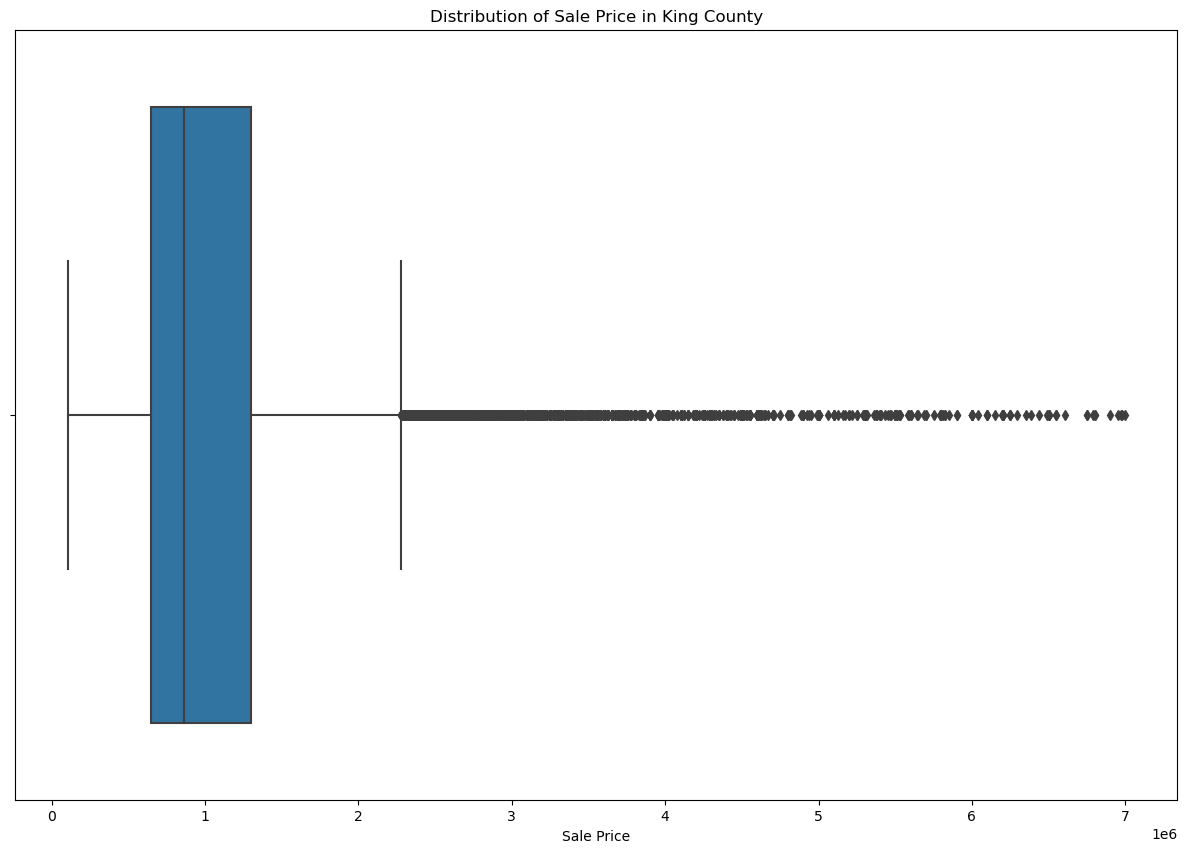

In [28]:
fig = plt.figure(figsize=(15, 10))
sns.boxplot(x = kc_house_df["price"])
plt.title('Distribution of Sale Price in King County')
plt.xlabel('Sale Price')
plt.show();

C:\Users\albane.colmenares\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


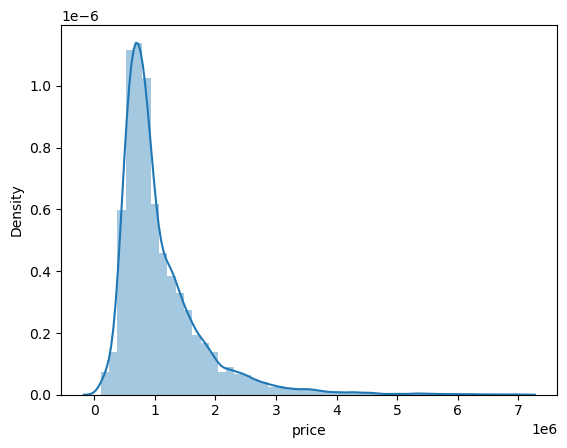

In [29]:
sns.distplot(kc_house_df["price"])
mean_price = kc_house_df["price"].mean()
# ax.axvline(x=mean_price, color="black", lw=2.5);

### 3.(a). Data Exploration

Inspect the value counts for the categorical features

In [30]:
categoricals = kc_house_df.select_dtypes(include=[object])

for col in categoricals:
    print(kc_house_df[col].value_counts(), "\n")

NO     24736
YES     5191
Name: nuisance, dtype: int64 

Average      18385
Good          8017
Very Good     3242
Fair           224
Poor            59
Name: condition, dtype: int64 

7 Average        11653
8 Good            9360
9 Better          3794
6 Low Average     2827
10 Very Good      1357
5 Fair             383
11 Excellent       382
12 Luxury          104
4 Low               46
13 Mansion          12
3 Poor               8
2 Substandard        1
Name: grade, dtype: int64 

Gas                  20459
Electricity           6419
Oil                   2877
Gas/Solar               90
Electricity/Solar       59
Other                   19
Oil/Solar                4
Name: heat_source, dtype: int64 

PUBLIC                25605
PRIVATE                4315
PRIVATE RESTRICTED        4
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64 



# Comment here about categorical data

### 3. Build a baseline simple linear regression model

#### Identifying a Highly Correlated Predictor

The target variable is price. Looking at correlation coefficients for all predictor variables to find the one with the highest correlation with price.

In [31]:
kc_house_df.corr()["price"].sort_values()

sqft_lot         0.096905
yr_built         0.106209
floors           0.205952
sqft_basement    0.238018
sqft_garage      0.296795
sqft_patio       0.309581
bedrooms         0.337179
bathrooms        0.517427
sqft_above       0.583745
sqft_living      0.655892
price            1.000000
Name: price, dtype: float64

In [32]:
most_correlated = "sqft_living"

#### Plotting the predictor vs price

In [33]:
type(kc_house_df["price"])

pandas.core.series.Series

In [34]:
# Plotting a sample of 1000 data points, most_correlated vs. price

In [35]:
type(kc_house_df["price"].array)

pandas.core.arrays.numpy_.PandasArray

In [36]:
# Calculating regression line

x = kc_house_df["sqft_living"].array
y= kc_house_df["price"].array

m, b = np.polyfit(x, y, 1) 

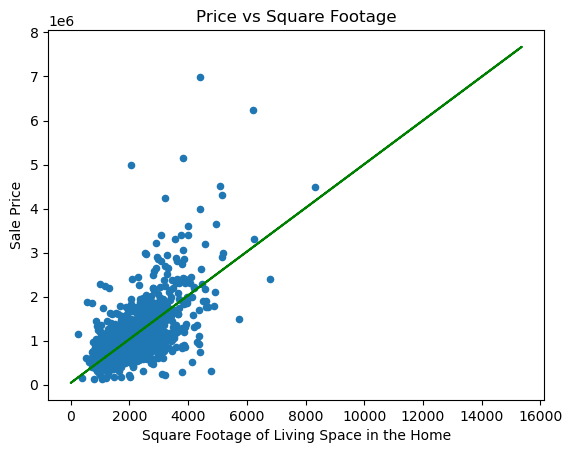

''

In [37]:
# Plotting scatter plot
kc_house_df.sample(1000, random_state=1).plot.scatter(x=most_correlated, y="price")

# Plotting regression line
plt.plot(x, m*x+b, color='green')

# Defining titles and legend
plt.title('Price vs Square Footage')
plt.xlabel('Square Footage of Living Space in the Home')
plt.ylabel('Sale Price')
plt.show();
;

### Setting Up Variables for Regression

Declaring y and X_baseline variables, where y is a Series containing price data and X_baseline is a DataFrame containing the column with the strongest correlation.

In [38]:
y = kc_house_df["price"]

X_baseline = kc_house_df[[most_correlated]]

### Creating and Fitting Simple Linear Regression

In [39]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

### 4. Evaluate and Interpret Baseline Model Results

In [40]:
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                 2.259e+04
Date:                Sun, 23 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:32:16   Log-Likelihood:            -4.3768e+05
No. Observations:               29927   AIC:                         8.754e+05
Df Residuals:                   29925   BIC:                         8.754e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.872e+04   7636.645      5.071      

In [41]:
baseline_mae = mean_absolute_error(y, baseline_results.predict(sm.add_constant(X_baseline)))
baseline_mae

364886.1488466341

#### Model Interpretation

sqft_living was the attribute the most strongly correlated with price. Consequently, the model is describing this relationship. 

Overall, the model is not very significant and explains only 43% of the price. In a typical predicion, the model is off by about \\$ 364,886.

* The intercept is about \\$38,720, meaning that a zero square foot living house would sell for \\$38,720.
* The coefficient for sqft_living is about \\$497. This means that for each additional square foot of living space in the home. 
* ALPHA


### 5. Prepare a Categorical Feature for Multiple Regression Modeling

#### Identifying a Promising Predictor

In [42]:
categorical_features = categoricals.columns

In [43]:
categorical_features

Index(['nuisance', 'condition', 'grade', 'heat_source', 'sewer_system'], dtype='object')

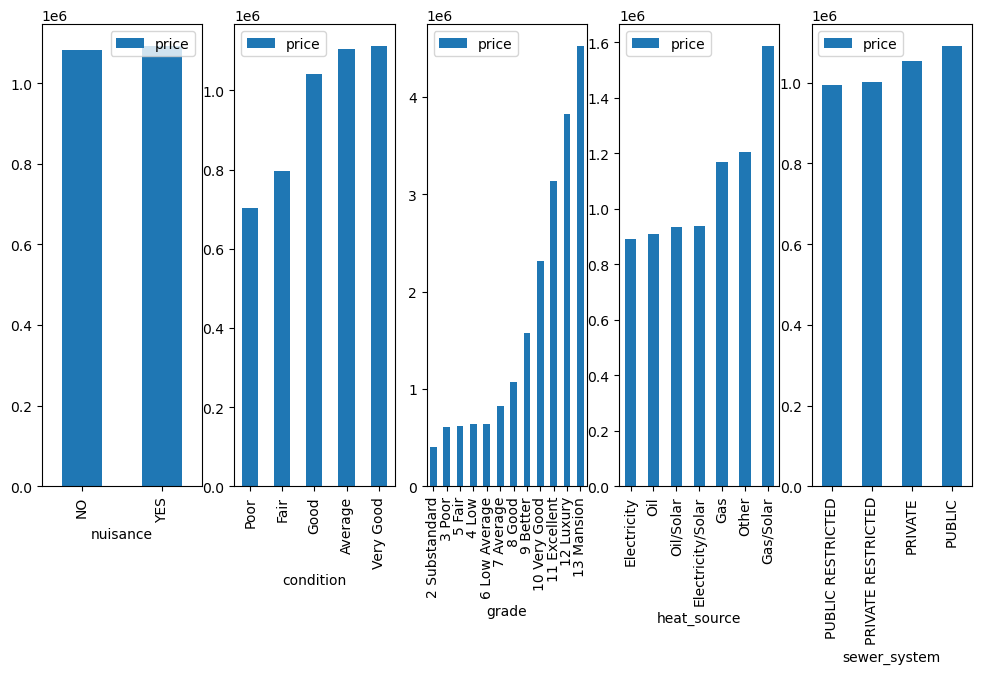

In [44]:
fig, axes = plt.subplots(ncols=len(categorical_features), figsize=(12, 6))
for index, feature in enumerate(categoricals):
    kc_house_df.groupby(feature).mean().sort_values("price").plot.bar(y="price", ax=axes[index])

Most categorical features seem to correlate with price except for nuisance.

We will start with the overall representation: condition, as even though grade gives an idea, reaching a mansion by renovation is less likely. 

In [45]:
cat_feature = "condition"

#### Setting Up Variables for Regression

Createing a variable X_iterated : a DataFrame containing the column with the strongest
correlation and your selected categorical feature.

In [46]:
X_iterated = kc_house_df[[most_correlated, cat_feature]]
X_iterated

,sqft_living,condition
0,1180,Good
1,2770,Average
2,2880,Average
3,2160,Average
4,1120,Average
...,...,...
30150,1910,Good
30151,2020,Average
30152,1620,Average
30153,2570,Average


#### Preprocessing Categorical Variable

In [47]:
X_iterated = pd.get_dummies(X_iterated, columns=[cat_feature])
X_iterated

,sqft_living,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,1180,0,0,1,0,0
1,2770,1,0,0,0,0
2,2880,1,0,0,0,0
3,2160,1,0,0,0,0
4,1120,1,0,0,0,0
...,...,...,...,...,...,...
30150,1910,0,0,1,0,0
30151,2020,1,0,0,0,0
30152,1620,1,0,0,0,0
30153,2570,1,0,0,0,0


In [48]:
# Dropping "condition_Poor" as a baseline, because is the worst ranking given for a condition 

In [49]:
X_iterated.drop("condition_Poor", axis=1, inplace=True)
X_iterated

,sqft_living,condition_Average,condition_Fair,condition_Good,condition_Very Good
0,1180,0,0,1,0
1,2770,1,0,0,0
2,2880,1,0,0,0
3,2160,1,0,0,0
4,1120,1,0,0,0
...,...,...,...,...,...
30150,1910,0,0,1,0
30151,2020,1,0,0,0
30152,1620,1,0,0,0
30153,2570,1,0,0,0


### 6. Build a Multiple Linear Regression Model

Using the y variable from our previous model and X_iterated , building a model called iterated_model
and a regression results object called iterated_results .

In [50]:
iterated_model = sm.OLS(y, sm.add_constant(X_iterated))
iterated_results = iterated_model.fit()

### 6. Evaluating and Interpreting Multiple Linear Regression Model Results

In [51]:
print(iterated_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     4542.
Date:                Sun, 23 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:32:17   Log-Likelihood:            -4.3765e+05
No. Observations:               29927   AIC:                         8.753e+05
Df Residuals:                   29921   BIC:                         8.754e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.198e+04   7

In [52]:
iterated_mae = mean_absolute_error(y, iterated_results.predict(sm.add_constant(X_iterated)))
baseline_mae, iterated_mae

(364886.1488466341, 364697.3526650077)

In [53]:
baseline_results.rsquared_adj, iterated_results.rsquared_adj

(0.4301754416550063, 0.4313831548873769)